In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import integrate
from copy import deepcopy

# cloelib imports
from cloelib.cosmology.camb_cosmology import CAMBBackground, CAMBLinearPerturbations, CAMBNonLinearPerturbations
from cloelib.cosmology.HMcode2020Emu_cosmology import HMemuLinearPerturbations, HMemuNonLinearPerturbations
from cloelib.observables.photo import ShearTracer, PositionsTracer
from cloelib.summary_statistics.angular_two_point import AngularTwoPoint
from cloelib.summary_statistics.angular_correlation_function_wigner import AngularCorrelationFunctionWigner

zs = np.linspace(1e-4, 3, 100)

z, nz = el.photo.redshift_distributions('/home/jipdebuck/nzTabSPV3.fits')

def normalize_dndz(nz_example, z_nz):
    normalized = {}
    for key in nz_example:
        normalized[key] = nz_example[key] / integrate.trapezoid(nz_example[key], z_nz)
    return normalized

# Normalize both dndz_pos and dndz_she
dndz_pos_norm = normalize_dndz(nz, z)
dndz_she_norm = normalize_dndz(nz, z)

# Function to resample the normalized dndz
def resample_dndz(nz_example, z_nz, myz):
    my_dndz = np.vstack(list(nz_example.values())) #stacking arrays vertically
    my_dndz_norm = np.zeros([len(nz_example), len(myz)]) #creating an empty array
    for i in range(len(nz_example)):
        my_dndz_norm[i, :] = np.interp(myz, z_nz, my_dndz[i, :]) #interpolating to new myz values
    return my_dndz_norm

# Resampling the normalized dndz with 100 values
my_dndz_pos_norm = resample_dndz(dndz_pos_norm, z, zs)
my_dndz_she_norm = resample_dndz(dndz_she_norm, z, zs)

gp_predictions = np.load('gp_predictions_dict.npy', allow_pickle=True).item()


In [22]:
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette("Paired"))

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('font',size=20)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('lines', linewidth=3)
plt.rc('lines', markersize=6)
plt.rc('legend', fontsize=14)

zs = np.linspace(1e-4, 3, 100)

# The arguments of the Background functions follow the cosmology.API
background = CAMBBackground(H0=70.0, 
                            Omega_cdm0=0.25, 
                            Omega_b0=0.05, 
                            w0=-1, 
                            wa=0, 
                            Omega_k0 = 0.0, 
                            ns = 0.96, 
                            As = 2e-9,
                            mnu = 0.06,
                            gamma_MG = 0.545,
                            N_mnu = 1)
linear_perturbations_emu = HMemuLinearPerturbations(background, zs)
nonlinear_perturbations_emu = HMemuNonLinearPerturbations(background, linear_perturbations_emu, zs, log10TAGN=7.8)

# Select the perturbations object you want to use
perturbations = nonlinear_perturbations_emu

# Define the tracers
tracer_pos = PositionsTracer(perturbations=perturbations, 
                             dndz=my_dndz_pos_norm,
                             z = zs,
                             galaxy_bias_model='poly',
                             nuisance_params={'b1_photo_poly0': 1.0, 'b1_photo_poly1': 0.0, 
                                              'b1_photo_poly2': 0.0, 'b1_photo_poly3': 0.0,
                                              'magnification_bias_1': 0.0, 'magnification_bias_2': 0.0,
                                              'magnification_bias_3': 0.0, 'magnification_bias_4': 0.0,
                                              'magnification_bias_5': 0.0, 'magnification_bias_6': 0.0,
                                              'magnification_bias_7': 0.0, 'magnification_bias_8': 0.0,
                                              'magnification_bias_9': 0.0, 'magnification_bias_10': 0.0,
                                              'magnification_bias_11': 0.0, 'magnification_bias_12': 0.0,
                                              'magnification_bias_13': 0.0,
                                              'dz_pos_1': 0.0001, 'dz_pos_2': 0.0001,
                                              'dz_pos_3': 0.0001, 'dz_pos_4': 0.0001,
                                              'dz_pos_5': 0.0001, 'dz_pos_6': 0.0001,
                                              'dz_pos_7': 0.0001, 'dz_pos_8': 0.0001,
                                              'dz_pos_9': 0.0001, 'dz_pos_10': 0.0001,
                                              'dz_pos_11': 0.0001, 'dz_pos_12': 0.0001,
                                              'dz_pos_13': 0.0001})

tracer_she = ShearTracer(perturbations=perturbations, 
                             dndz=my_dndz_she_norm,
                             z = zs,
                             nuisance_params={'AIA': 1.72, 'CIA': 0.0134, 'EtaIA':-0.41,
                                              'multiplicative_bias_1': 0.001, 'multiplicative_bias_2': 0.001,
                                              'multiplicative_bias_3': 0.001, 'multiplicative_bias_4': 0.001,
                                              'multiplicative_bias_5': 0.001, 'multiplicative_bias_6': 0.001,
                                              'multiplicative_bias_7': 0.001, 'multiplicative_bias_8': 0.001,
                                              'multiplicative_bias_9': 0.001, 'multiplicative_bias_10': 0.001,
                                              'multiplicative_bias_11': 0.001, 'multiplicative_bias_12': 0.001,
                                              'multiplicative_bias_13': 0.001,
                                              'dz_shear_1': 0.0001, 'dz_shear_2': 0.0001,
                                              'dz_shear_3': 0.0001, 'dz_shear_4': 0.0001,
                                              'dz_shear_5': 0.0001, 'dz_shear_6': 0.0001,
                                              'dz_shear_7': 0.0001, 'dz_shear_8': 0.0001,
                                              'dz_shear_9': 0.0001, 'dz_shear_10': 0.0001,
                                              'dz_shear_11': 0.0001, 'dz_shear_12': 0.0001,
                                              'dz_shear_13': 0.0001})

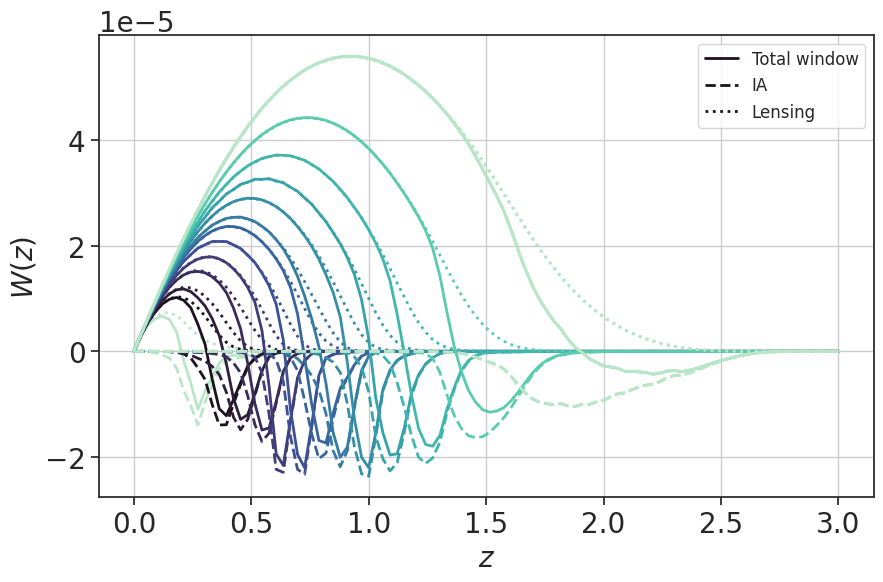

In [23]:
colors = sns.color_palette("mako", 13)

# Create the figure
plt.figure(figsize=(10, 6))

# Plot all three sets of data in one loop

for i in range(0, 14):
    # Plot the window
    plt.plot(perturbations.z, 
             tracer_she.get_window(perturbations.z)[i, :], 
             linewidth=2, 
             color=colors[i-1], 
             label=f'Total window' if i == 1 else "")
    
    # Plot the intrinsic alignment window
    plt.plot(perturbations.z, 
             tracer_she.get_window_IA(perturbations.z)[i, :], 
             linewidth=2, 
             linestyle='--', 
             color=colors[i-1], 
             label=f'IA' if i == 1 else "")
    
    # Plot the lensing window
    plt.plot(perturbations.z, 
             tracer_she.get_window_lensing(perturbations.z)[i, :], 
             linewidth=2, 
             linestyle=':', 
             color=colors[i-1], 
             label=f'Lensing' if i == 1 else "")

# Label the axes
plt.xlabel(r'$z$')
plt.ylabel(r'$W(z)$')

# Add the legend and grid
plt.legend(fontsize=12, loc='upper right')
plt.grid(True)

# Show the plot
plt.show()


400 400


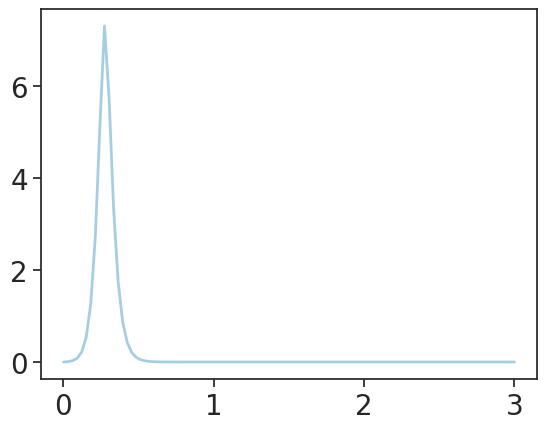

In [24]:
z_pred = np.linspace(0, 3, 400).reshape(-1, 1)
def resample_dndz_gp(gp_predictions, z_pred, zs):
    for key in gp_predictions.keys():
        gp_predictions[key] = gp_predictions[key][0]

    my_dndz = np.vstack(list(gp_predictions.values())) 
    my_dndz_norm = np.zeros([len(gp_predictions), len(zs)])
    print(len(my_dndz[0,:]), len(z_pred))
    for i in range(len(gp_predictions)):
        # gp_predictions[i][0] is 1D array of n(z) for bin i

        my_dndz_norm[i, :] = np.interp(zs, z_pred[:,0], my_dndz[i, :])
    
    return my_dndz_norm

my_dndz_norm_gp = resample_dndz_gp(gp_predictions, z_pred, zs)
plt.plot(zs, my_dndz_norm_gp[0,:], label='Reconstructed n(z) bin 1', linewidth=2)


In [25]:
#Plotting of new Cells with GP reconstructed n(z)

tracer_pos_gp = PositionsTracer(perturbations=perturbations, 
                             dndz=my_dndz_norm_gp,  
                             z = zs,
                             galaxy_bias_model='poly',
                             nuisance_params={'b1_photo_poly0': 1.0, 'b1_photo_poly1': 0.0, 
                                              'b1_photo_poly2': 0.0, 'b1_photo_poly3': 0.0,
                                              'magnification_bias_1': 0.0, 'magnification_bias_2': 0.0,
                                              'magnification_bias_3': 0.0, 'magnification_bias_4': 0.0,
                                              'magnification_bias_5': 0.0, 'magnification_bias_6': 0.0,
                                              'magnification_bias_7': 0.0, 'magnification_bias_8': 0.0,
                                              'magnification_bias_9': 0.0, 'magnification_bias_10': 0.0,
                                              'magnification_bias_11': 0.0, 'magnification_bias_12': 0.0,
                                              'magnification_bias_13': 0.0,
                                              'dz_pos_1': 0.0001, 'dz_pos_2': 0.0001,
                                              'dz_pos_3': 0.0001, 'dz_pos_4': 0.0001,
                                              'dz_pos_5': 0.0001, 'dz_pos_6': 0.0001,
                                              'dz_pos_7': 0.0001, 'dz_pos_8': 0.0001,
                                              'dz_pos_9': 0.0001, 'dz_pos_10': 0.0001,
                                              'dz_pos_11': 0.0001, 'dz_pos_12': 0.0001,
                                              'dz_pos_13': 0.0001})

tracer_she_gp = ShearTracer(perturbations=perturbations, 
                             dndz=my_dndz_norm_gp,
                             z = zs,
                             nuisance_params={'AIA': 1.72, 'CIA': 0.0134, 'EtaIA':-0.41,
                                              'multiplicative_bias_1': 0.001, 'multiplicative_bias_2': 0.001,
                                              'multiplicative_bias_3': 0.001, 'multiplicative_bias_4': 0.001,
                                              'multiplicative_bias_5': 0.001, 'multiplicative_bias_6': 0.001,
                                              'multiplicative_bias_7': 0.001, 'multiplicative_bias_8': 0.001,
                                              'multiplicative_bias_9': 0.001, 'multiplicative_bias_10': 0.001,
                                              'multiplicative_bias_11': 0.001, 'multiplicative_bias_12': 0.001,
                                              'multiplicative_bias_13': 0.001,
                                              'dz_shear_1': 0.0001, 'dz_shear_2': 0.0001,
                                              'dz_shear_3': 0.0001, 'dz_shear_4': 0.0001,
                                              'dz_shear_5': 0.0001, 'dz_shear_6': 0.0001,
                                              'dz_shear_7': 0.0001, 'dz_shear_8': 0.0001,
                                              'dz_shear_9': 0.0001, 'dz_shear_10': 0.0001,
                                              'dz_shear_11': 0.0001, 'dz_shear_12': 0.0001,
                                              'dz_shear_13': 0.0001})



<>:34: SyntaxWarning: invalid escape sequence '\e'
<>:43: SyntaxWarning: invalid escape sequence '\e'
<>:34: SyntaxWarning: invalid escape sequence '\e'
<>:43: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_18128/403683318.py:34: SyntaxWarning: invalid escape sequence '\e'
  axes[0].set_title("Old $n(z)$ (dashed lines) vs new $n(z)$ (solid lines) $C^{gg}(\ell)$'s", fontsize=14)
/tmp/ipykernel_18128/403683318.py:43: SyntaxWarning: invalid escape sequence '\e'
  axes[1].set_title("Relative difference between old $n(z)$ and new $n(z)$ $C^{gg}(\ell)$'s", fontsize=14)


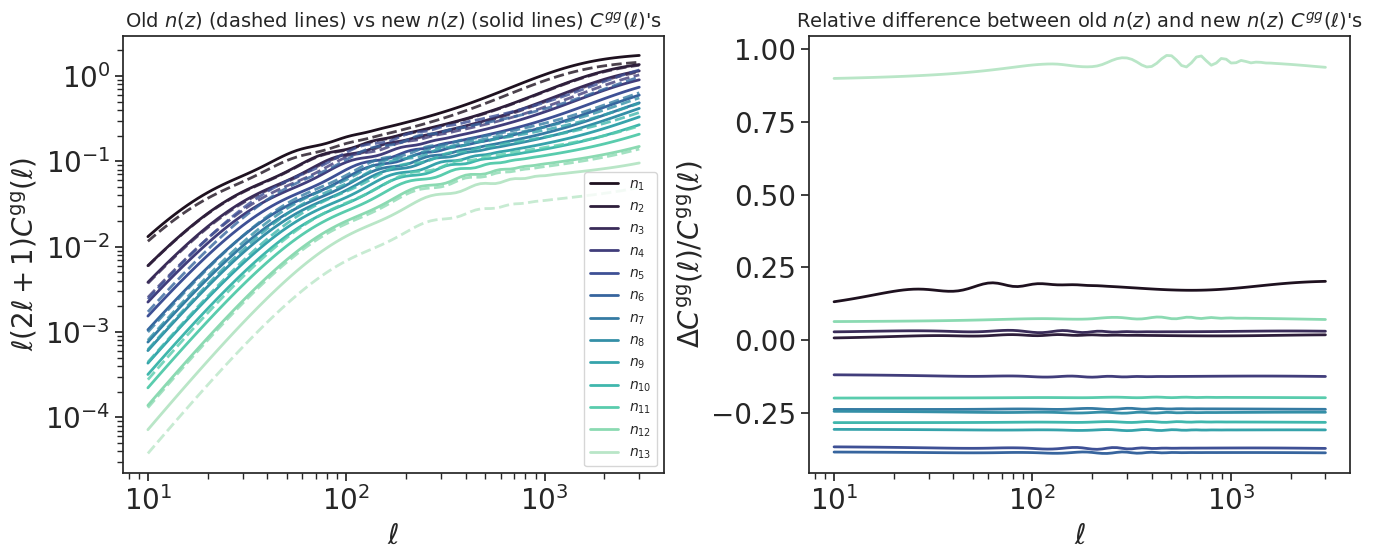

In [26]:
nl = 100
ells = np.logspace(1., np.log10(3000), nl)

twopoint_pospos = AngularTwoPoint(tracer_pos, tracer_pos)
twopoint_shepos = AngularTwoPoint(tracer_she, tracer_pos)
twopoint_posshe = AngularTwoPoint(tracer_pos, tracer_she)
twopoint_sheshe = AngularTwoPoint(tracer_she, tracer_she)

cells ={**twopoint_pospos.get_Cl(ells, 0, perturbations.k)
, **twopoint_shepos.get_Cl(ells, 0, perturbations.k)
, **twopoint_sheshe.get_Cl(ells, 0, perturbations.k)}

twopoint_pospos_gp = AngularTwoPoint(tracer_pos_gp, tracer_pos_gp)
twopoint_shepos_gp = AngularTwoPoint(tracer_she_gp, tracer_pos_gp)
twopoint_posshe_gp = AngularTwoPoint(tracer_pos_gp, tracer_she_gp)
twopoint_sheshe_gp = AngularTwoPoint(tracer_she_gp, tracer_she_gp)

cells_gp ={**twopoint_pospos_gp.get_Cl(ells, 0, perturbations.k)
, **twopoint_shepos_gp.get_Cl(ells, 0, perturbations.k)
, **twopoint_sheshe_gp.get_Cl(ells, 0, perturbations.k)}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


for i in range(0, 13):
    ells = cells_gp['POS', 'POS', i+1, i+1].ell
    axes[0].loglog(ells, ells*(2*ells+1)*cells_gp['POS', 'POS', i+1, i+1], label = '$n_{{{}}}$'.format(i+1), linewidth=2, color=colors[i])

for i in range(0, 13):
    ells = cells['POS', 'POS', i+1, i+1].ell
    axes[0].loglog(ells, ells*(2*ells+1)*cells['POS', 'POS', i+1, i+1], linestyle='--', alpha=0.8, linewidth=2, color=colors[i])
axes[0].set_xlabel(r'$\ell$')
axes[0].set_ylabel(r'$\ell (2\ell +1)C^{\rm gg}(\ell)$');
axes[0].set_title("Old $n(z)$ (dashed lines) vs new $n(z)$ (solid lines) $C^{gg}(\ell)$'s", fontsize=14)
axes[0].legend(fontsize=10, loc='lower right', frameon=True)

for i in range(0,13):
    ells = cells['POS', 'POS', i+1, i+1].ell
    cells_diff = (np.asarray(cells_gp['POS', 'POS', i+1, i+1]) - np.asarray(cells['POS', 'POS', i+1, i+1])) / (np.asarray(cells['POS', 'POS', i+1, i+1]))
    axes[1].semilogx(ells, cells_diff, label = '$n_{{{}}}$'.format(i+1), linewidth=2, color=colors[i])
axes[1].set_xlabel(r'$\ell$')
axes[1].set_ylabel(r'$\Delta C^{\rm gg}(\ell)/C^{\rm gg}(\ell)$')
axes[1].set_title("Relative difference between old $n(z)$ and new $n(z)$ $C^{gg}(\ell)$'s", fontsize=14)
#handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.02, 0.5))

# Adjust layout so legend fits nicely
plt.subplots_adjust(right=0.95, wspace=0.15)
plt.tight_layout()
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_18128/495471763.py:13: SyntaxWarning: invalid escape sequence '\e'
  axes[0].set_title("Old $n(z)$ (dashed lines) vs new $n(z)$ (solid lines) $C^{EE}(\ell)$'s", fontsize=14)
/tmp/ipykernel_18128/495471763.py:22: SyntaxWarning: invalid escape sequence '\e'
  axes[1].set_title("Relative difference between old $n(z)$ and new $n(z)$ $C^{EE}(\ell)$'s", fontsize=14)


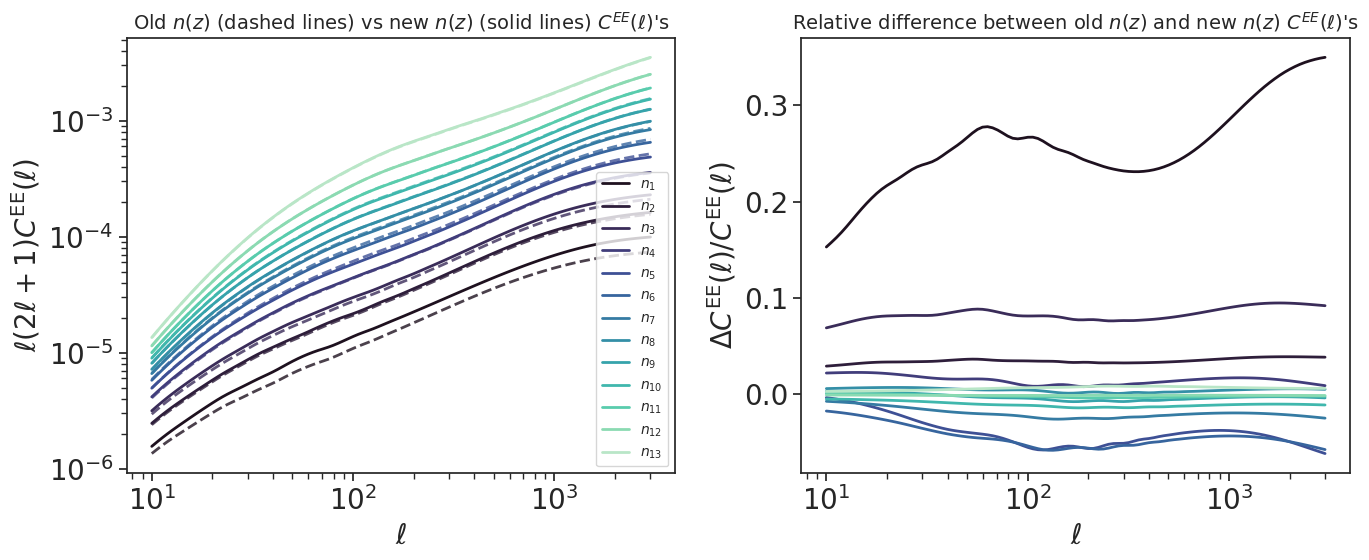

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


for i in range(0, 13):
    ells = cells_gp['SHE', 'SHE', i+1, i+1].ell
    axes[0].loglog(ells, ells*(2*ells+1)*cells_gp['SHE', 'SHE', i+1, i+1][0,0], label = '$n_{{{}}}$'.format(i+1), linewidth=2, color=colors[i])

for i in range(0, 13):
    ells = cells['SHE', 'SHE', i+1, i+1].ell
    axes[0].loglog(ells, ells*(2*ells+1)*cells['SHE', 'SHE', i+1, i+1][0,0], linestyle='--', alpha=0.8, linewidth=2, color=colors[i])
axes[0].set_xlabel(r'$\ell$')
axes[0].set_ylabel(r'$\ell (2\ell +1)C^{\rm EE}(\ell)$');
axes[0].set_title("Old $n(z)$ (dashed lines) vs new $n(z)$ (solid lines) $C^{EE}(\ell)$'s", fontsize=14)
axes[0].legend(fontsize=10, loc='lower right', frameon=True)

for i in range(0,13):
    ells = cells['SHE', 'SHE', i+1, i+1].ell
    cells_diff = (np.asarray(cells_gp['SHE', 'SHE', i+1, i+1][0,0]) - np.asarray(cells['SHE', 'SHE', i+1, i+1][0,0])) / (np.asarray(cells['SHE', 'SHE', i+1, i+1][0,0]))
    axes[1].semilogx(ells, cells_diff, label = '$n_{{{}}}$'.format(i+1), linewidth=2, color=colors[i])
axes[1].set_xlabel(r'$\ell$')
axes[1].set_ylabel(r'$\Delta C^{\rm EE}(\ell)/C^{\rm EE}(\ell)$')
axes[1].set_title("Relative difference between old $n(z)$ and new $n(z)$ $C^{EE}(\ell)$'s", fontsize=14)
#handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='center right')

# Adjust layout so legend fits nicely
plt.subplots_adjust(right=0.85, wspace=0.25)
plt.tight_layout()
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_18128/3557029578.py:13: SyntaxWarning: invalid escape sequence '\e'
  axes[0].set_title("Old $n(z)$ (dashed lines) vs new $n(z)$ (solid lines) $C^{gE}(\ell)$'s", fontsize=14)
/tmp/ipykernel_18128/3557029578.py:24: SyntaxWarning: invalid escape sequence '\e'
  axes[1].set_title("Relative difference between old $n(z)$ and new $n(z)$ $C^{gE}(\ell)$'s", fontsize=14)


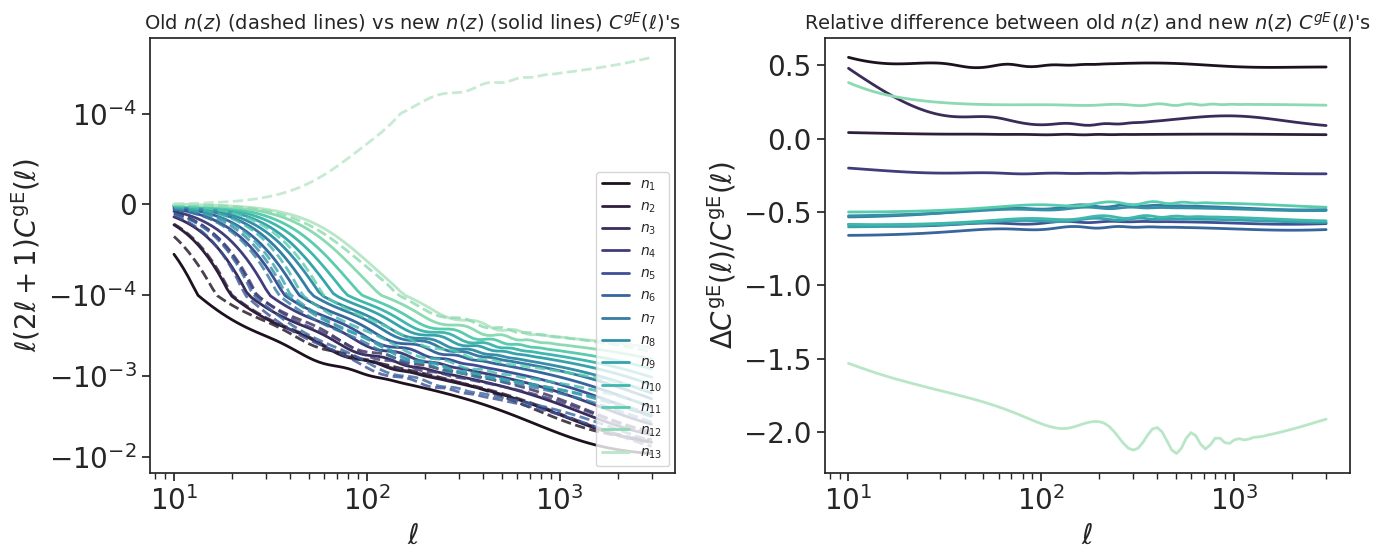

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


for i in range(0, 13):
    ells = cells_gp['POS', 'SHE', i+1, i+1].ell
    axes[0].loglog(ells, ells*(2*ells+1)*cells_gp['POS', 'SHE', i+1, i+1][0], label = '$n_{{{}}}$'.format(i+1), linewidth=2, color=colors[i])

for i in range(0, 13):
    ells = cells['POS', 'SHE', i+1, i+1].ell
    axes[0].loglog(ells, ells*(2*ells+1)*cells['POS', 'SHE', i+1, i+1][0], linestyle='--', alpha=0.8, linewidth=2, color=colors[i])
axes[0].set_xlabel(r'$\ell$')
axes[0].set_ylabel(r'$\ell (2\ell +1)C^{\rm gE}(\ell)$');
axes[0].set_title("Old $n(z)$ (dashed lines) vs new $n(z)$ (solid lines) $C^{gE}(\ell)$'s", fontsize=14)
axes[0].legend(fontsize=10, loc='lower right', frameon=True)
axes[0].set_yscale('symlog', linthresh=1e-4)
axes[0].set_xscale('log')

for i in range(0,13):
    ells = cells['POS', 'SHE', i+1, i+1].ell
    cells_diff = (np.asarray(cells_gp['POS', 'SHE', i+1, i+1][0]) - np.asarray(cells['POS', 'SHE', i+1, i+1][0])) / (np.asarray(cells['POS', 'SHE', i+1, i+1][0]))
    axes[1].semilogx(ells, cells_diff, label = '$n_{{{}}}$'.format(i+1), linewidth=2, color=colors[i])
axes[1].set_xlabel(r'$\ell$')
axes[1].set_ylabel(r'$\Delta C^{\rm gE}(\ell)/C^{\rm gE}(\ell)$')
axes[1].set_title("Relative difference between old $n(z)$ and new $n(z)$ $C^{gE}(\ell)$'s", fontsize=14)
#handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='center right')

# Adjust layout so legend fits nicely
plt.subplots_adjust(right=0.85, wspace=0.25)
plt.tight_layout()
plt.show()